<a href="https://colab.research.google.com/github/seungbok3240/DeepLearning/blob/master/SingleLayer(python)_2020_02_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prologue

저번에 사용했던 유방암 데이터 세트를 사용한다.

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [0]:
x = cancer.data
y = cancer.target

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.2, random_state=42)

# SingleLayer 구현

In [0]:
import numpy as np

In [0]:
class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0],1)),x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])  #가중치 초기화
    self.b = 0  #절편 초기화
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))  #인덱스를 섞습니다.(매 에포크 마다 훈련 샘플을 다양하게 하기 위함)
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)  #log(a)를 위한 작업

        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  #에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))
  
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0
  
  def score(self, x, y):
    return np.mean(self.predict(x) == y)

# SingleLayer Model Training

In [12]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.9473684210526315

94%의 정확성이 나온것을 볼 수 있습니다.<br>
지난번의 [로지스틱 회귀](https://colab.research.google.com/github/seungbok3240/DeepLearning/blob/master/Binaryclassification_2020_02_27.ipynb)와 비교해서 12%가 오른것을 볼 수 있습니다.

위와 같이 정확성이 높아진 이유는<br>
- 훈련 세트를 무작위로 섞어 손실 함수의 값을 줄였기 때문입니다.

In [0]:
import matplotlib.pyplot as plt

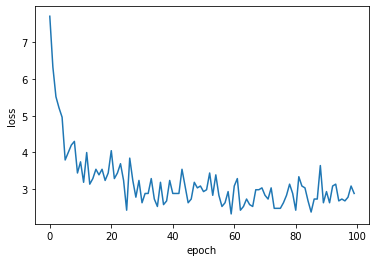

In [15]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()